## **# performing a classification task on heart disease data set**





**Importing libriraies and reading data**

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

In [41]:
from google.colab import files
uploaded=files.upload()


Saving heart.csv to heart (1).csv


In [42]:
data = pd.read_csv('heart.csv')

In [43]:
data.info()
#14 columns , there are no null values in the data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [44]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [45]:
data.describe().T
# made it transpose for a better view

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


**introducing categorial data based on the elements discribtion of the dataset**

In [46]:
li=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data[li] = data[li].astype(object)

## EXPLORING THE DATA

# **Is our data balanced or not?**

**the results proved that the data set is balanced**

In [48]:
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

Text(0.5, 0.98, 'Heart Diseases Distribution')

<Figure size 1152x576 with 0 Axes>

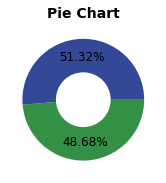

In [49]:
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['target'].value_counts(), 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# **next here we will se the data distribution for both categorial data and numerical data**

In [50]:
def cat_feature_plot(f_name):

 feature_value=data[f_name].value_counts().values
 feature_index=data[f_name].value_counts().index

 plt.figure(figsize=(15,5))
 plt.style.use('seaborn-dark-palette')
 plt.suptitle('*'*10+'distribution of categorical feature : {}'.format(f_name)+'*'*10 , fontweight='heavy')
##### pie chart ####
 plt.subplot(1,2,1)
 plt.pie(feature_value , labels=feature_index,autopct='%1.1f%%')
 plt.title('pie chart')


###### bar plot  ####
 plt.subplot(1,2,2)
 plt.bar(x=feature_index,height=feature_value,color=['red','green','blue','pink','black'])
 plt.xticks(feature_index)
 plt.title('bar chart')
 

[None, None, None, None, None, None, None, None]

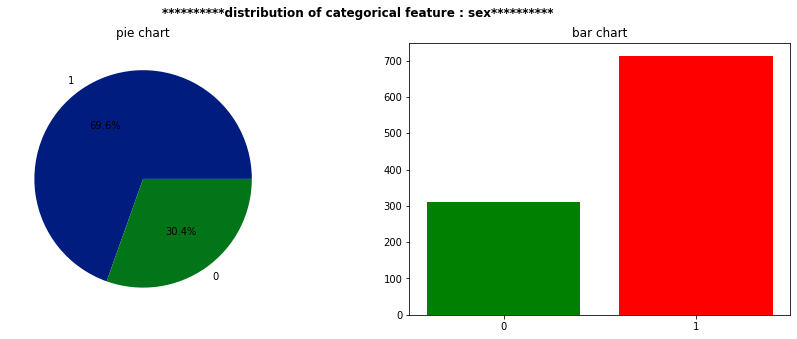

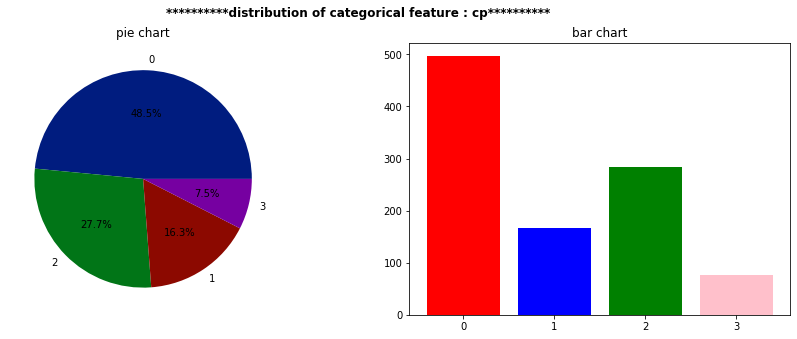

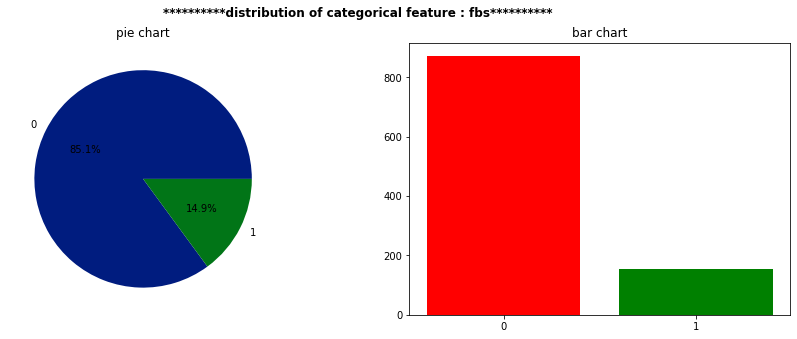

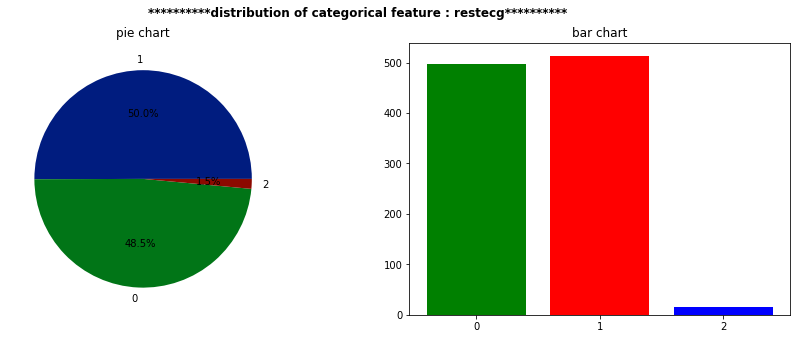

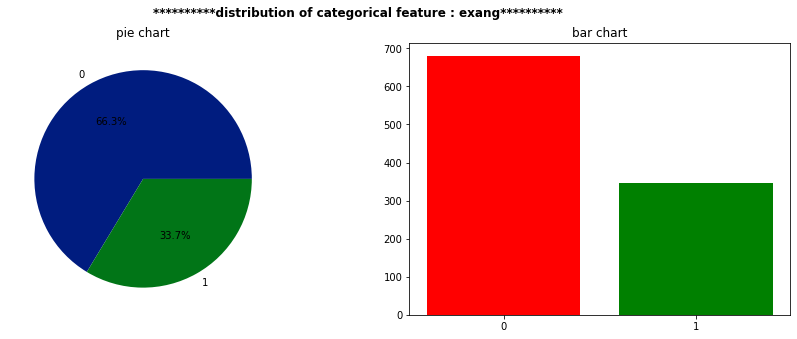

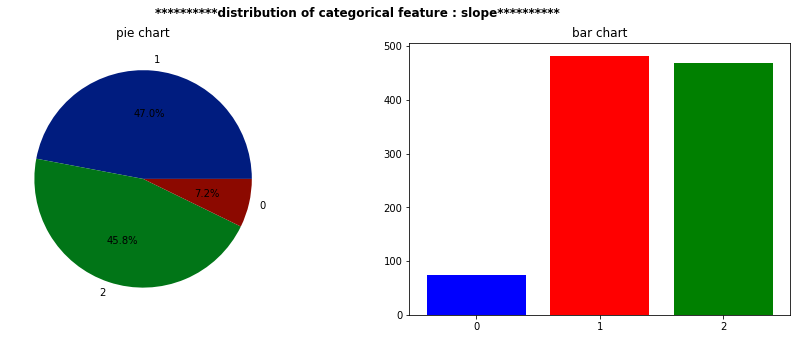

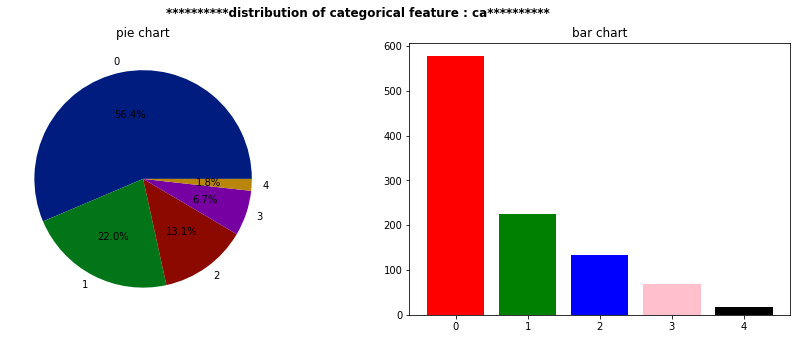

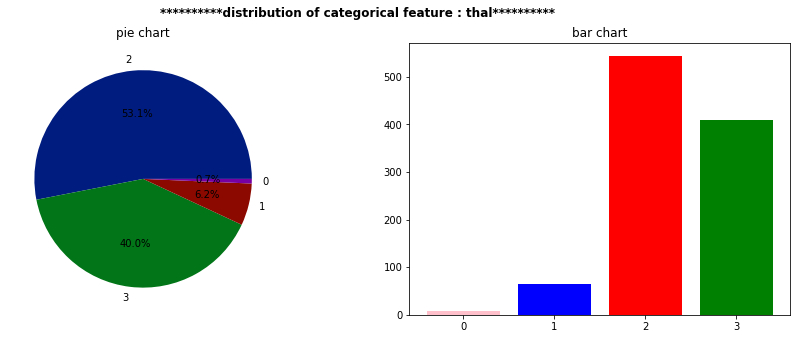

In [51]:
li=['sex','cp','fbs','restecg','exang','slope' ,'ca','thal' ]
list(map(cat_feature_plot,li))

In [52]:
num_columns=['age','trestbps', 'chol' , 'thalach','oldpeak']
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [53]:
def plot_numerical_dist(f_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('*'*10+'distribution of numerical feature : {}'.format(f_name)+'*'*10 , fontweight='heavy')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=f_name , kde=True )
    
    plt.subplot(1,4,4)
    sns.boxenplot(data=data , x=f_name,linewidth=1.5)

[None, None, None, None, None]

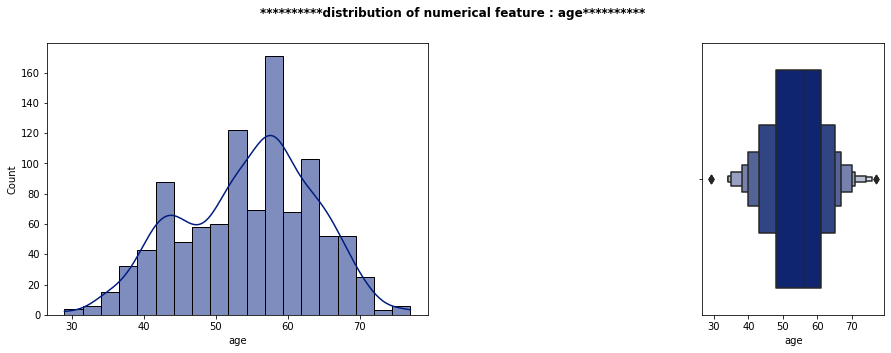

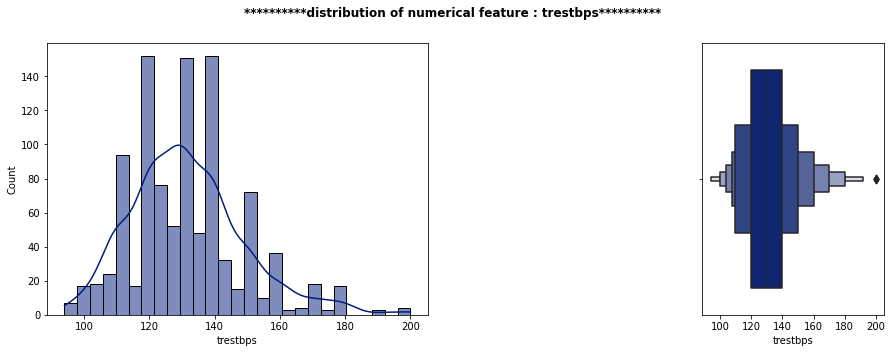

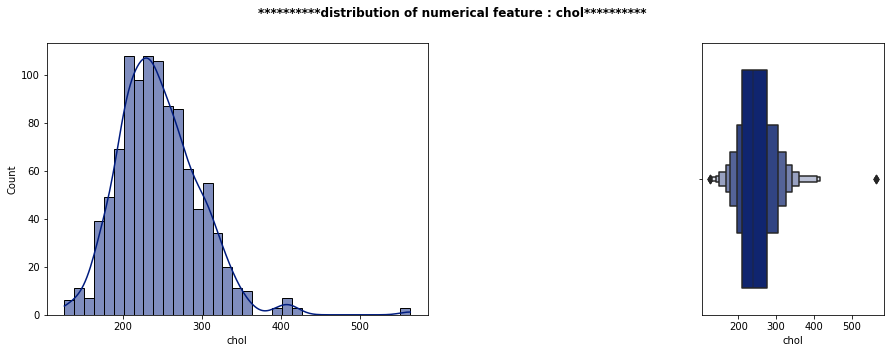

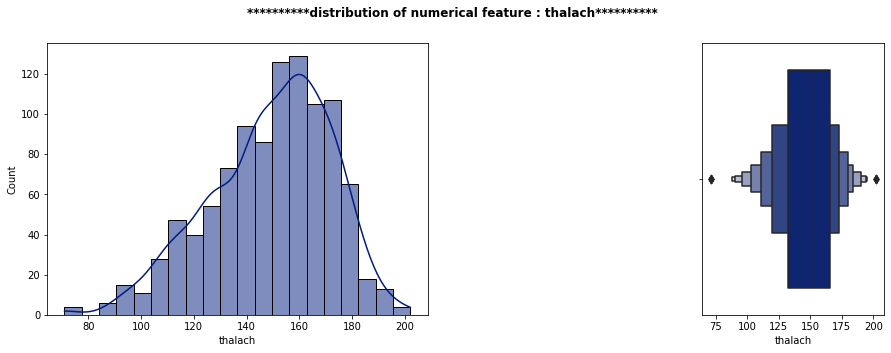

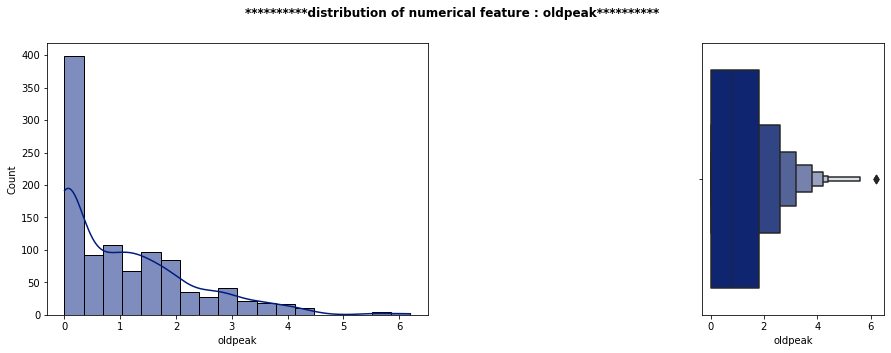

In [54]:
list(map(plot_numerical_dist,num_columns))

**Discovering the coloration**

In [55]:
numericalToTarget=num_columns.append('target')

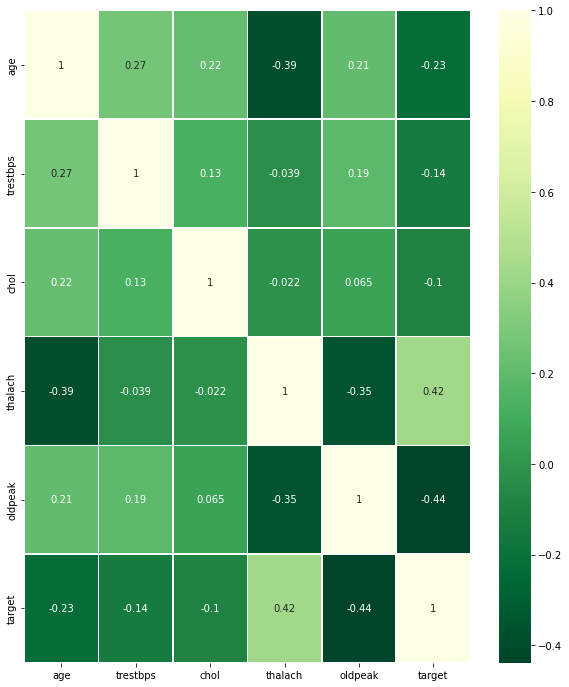

In [56]:
plt.figure(figsize=(10, 12))
sns.heatmap(data[num_columns].corr(), annot=True,cmap='YlGn_r', linewidths=0.5)

**the relation between categorial data with the target column represented in bars**

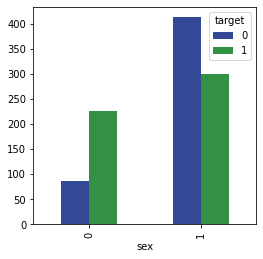

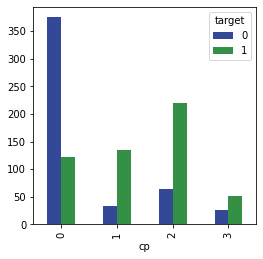

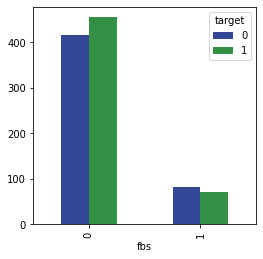

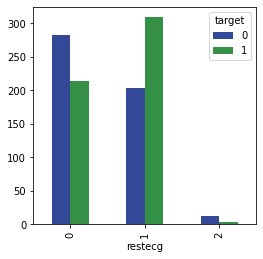

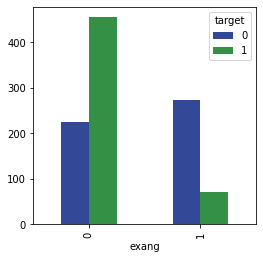

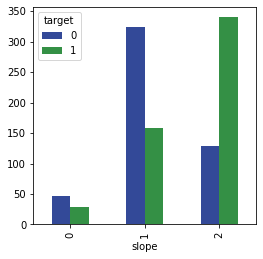

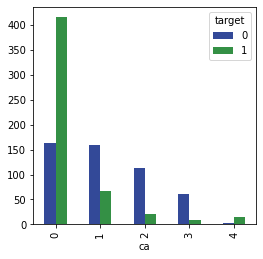

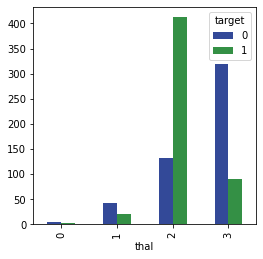

In [57]:
for col in li :
 pd.crosstab(data[col], data.target).plot(kind='bar', figsize=(4, 4), alpha=0.80)

# **Data pre-processing**

**What should be done with the categorial data?**

***encoding the categorial data***

In [58]:
cp = pd.get_dummies(data['cp'], prefix='cp')
restecg = pd.get_dummies(data['restecg'], prefix='restecg')
slope = pd.get_dummies(data['slope'], prefix='slope')
ca = pd.get_dummies(data['ca'], prefix='ca')
thal = pd.get_dummies(data['thal'], prefix='thal')

In [59]:
data.drop(columns=['cp','restecg', 'thal','ca', 'slope'] , inplace=True)
frames = [data, cp,restecg, thal,ca, slope]
data = pd.concat(frames, axis = 1)

In [60]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2
0,52,1,125,212,0,168,0,1.0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,...,0,1,1,0,0,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,1,...,0,1,1,0,0,0,0,1,0,0
3,61,1,148,203,0,161,0,0.0,0,1,...,0,1,0,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,1,...,1,0,0,0,0,1,0,0,1,0


In [61]:
X=data.drop(columns='target')
y=data['target']

In [62]:
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2
0,52,1,125,212,0,168,0,1.0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,1,0,...,0,1,1,0,0,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,1,0,...,0,1,1,0,0,0,0,1,0,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,0,1,...,1,0,1,0,0,0,0,0,0,1
1021,60,1,125,258,0,141,1,2.8,1,0,...,0,1,0,1,0,0,0,0,1,0
1022,47,1,110,275,0,118,1,1.0,1,0,...,1,0,0,1,0,0,0,0,1,0
1023,50,0,110,254,0,159,0,0.0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [63]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# **Applying Algorithms**

**KNN**

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
y_pred=knn.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[89  9]
 [10 97]]


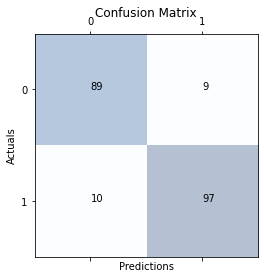

In [77]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])

In [82]:
from sklearn import metrics

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'KNN model Accuracy: {100*accracy:.3} %')
print (f'KNN model f1_score: {100*f1_score:.3} %')
print (f'KNN model precision: {100*precision:.3} %')
print (f'KNN model recall: {100*recall:.3}  %')

KNN model Accuracy: 90.7 %
KNN model f1_score: 91.1 %
KNN model precision: 91.5 %
KNN model recall: 90.7  %


In [80]:
error_rate = []
k_vals = range(1,5)

for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

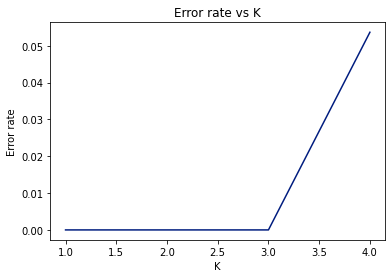

In [81]:
plt.plot(k_vals, error_rate)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

**SVM Algorithm**

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
from sklearn import svm
SVM_model=svm.SVC() 
SVM_model.fit(X_train,y_train)

SVC()

In [86]:
y_pred=SVM_model.predict(X_test)

In [87]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 95   3]
 [  0 107]]


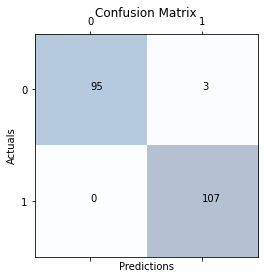

In [88]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [89]:
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'SVM_model model Accuracy: {100*accracy:.3} %')
print (f'SVM_model model f1_score: {100*f1_score:.3} %')
print (f'SVM_model model precision: {100*precision:.3} %')
print (f'SVM_model model recall: {100*recall:.3}  %')

SVM_model model Accuracy: 98.5 %
SVM_model model f1_score: 98.6 %
SVM_model model precision: 97.3 %
SVM_model model recall: 1e+02  %


**Logestic Regression**

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logModel = LogisticRegression(random_state= 0)
logModel.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [94]:
y_pred = logModel.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 84  14]
 [  6 101]]


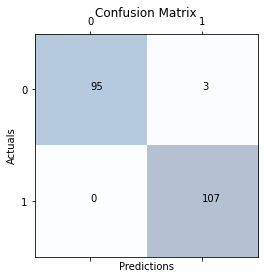

In [96]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [100]:
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'LR model Accuracy: {100*accracy:.3} %')
print (f'LR model f1_score: {100*f1_score:.3} %')
print (f'LR model model precision: {100*precision:.3} %')
print (f'LR model model recall: {100*recall:.3}  %')

LR model Accuracy: 90.2 %
LR model f1_score: 91.0 %
LR model model precision: 87.8 %
LR model model recall: 94.4  %


**Decision Tree**

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [99]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT_model=DecisionTreeClassifier() 
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
y_pred=DT_model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 98   0]
 [  0 107]]


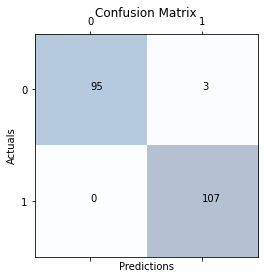

In [103]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [104]:
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f' DT model Accuracy: {100*accracy:.3} %')
print (f' DT model f1_score: {100*f1_score:.3} %')
print (f'DT model precision: {100*precision:.3} %')
print (f'DT model recall: {100*recall:.3}  %')

 DT model Accuracy: 1e+02 %
 DT model f1_score: 1e+02 %
DT model precision: 1e+02 %
DT model recall: 1e+02  %


**Random Forest**

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [106]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier() 
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
y_pred=RF_model.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 98   0]
 [  0 107]]


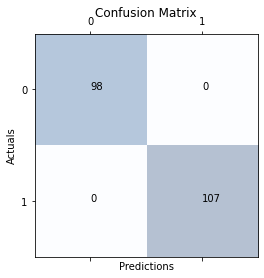

In [109]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

In [110]:
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f' RF model Accuracy: {100*accracy:.3} %')
print (f' RF model f1_score: {100*f1_score:.3} %')
print (f'RF model precision: {100*precision:.3} %')
print (f'RF model recall: {100*recall:.3}  %')

 RF model Accuracy: 1e+02 %
 RF model f1_score: 1e+02 %
RF model precision: 1e+02 %
RF model recall: 1e+02  %


**Ensamble**

In [113]:
from sklearn.ensemble import VotingClassifier

# initializing all the model objects with default parameters
model_1 = DecisionTreeClassifier()
model_2 = svm.SVC(probability= False)
model_3 = RandomForestClassifier()
 
# Making the final model using voting classifier

final_model = VotingClassifier(
    estimators=[('DT', model_1), ('svc', model_2), ('rf', model_3)],voting= 'hard')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
y_pred = final_model.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 98   0]
 [  0 107]]


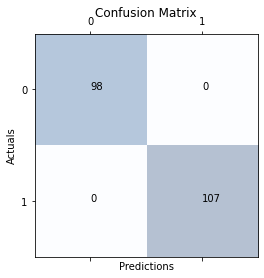

In [115]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

In [116]:
from sklearn import metrics

y_pred = final_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Ensemble model Accuracy: {100*accracy:.3} %')
print (f'Ensemble model f1_score: {100*f1_score:.3} %')
print (f'Ensemble model precision: {100*precision:.3} %')
print (f'Ensemble model recall: {100*recall:.3}  %')

Ensemble model Accuracy: 1e+02 %
Ensemble model f1_score: 1e+02 %
Ensemble model precision: 1e+02 %
Ensemble model recall: 1e+02  %


***Naive Baseline ***

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
model1=GaussianNB()
model1.fit(X_train,y_train)
pred1=model1.predict( X_test)

In [125]:
from sklearn import metrics

y_pred = final_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'NB model Accuracy: {100*accracy:.3} %')
print (f'NB model f1_score: {100*f1_score:.3} %')
print (f'NB model precision: {100*precision:.3} %')
print (f'NB model recall: {100*recall:.3}  %')

NB model Accuracy: 1e+02 %
NB model f1_score: 1e+02 %
NB model precision: 1e+02 %
NB model recall: 1e+02  %
